In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # Seperate train-test samples
from sklearn import preprocessing  # Scaling data
from sklearn.decomposition import PCA  # PCA implementation
#plotly fix
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# visualisation
import matplotlib.pyplot as plt   # Plots
import plotly.express as px # PCA plots
import seaborn as sns # Plots
import matplotlib as mpl
from cycler import cycler   # can help with assigning colors
from tabulate import tabulate # Creates tables
from sklearn.ensemble import ExtraTreesClassifier # Decision trees - used for feature importance
import matplotlib.lines as mlines # To be used for legends triangles/stars/other markers
# ML
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras import Sequential, Input
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import Adam
from keras import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from keras import regularizers
import tensorflow as tf
import tensorflow_probability as tfp
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
# Import Dataset
fraud = pd.read_csv("/content/drive/MyDrive/creditcard_2023.csv")
fraud = fraud.dropna()
fraud = fraud.loc[240000:300000]

Text(0.0, 1.0, 'Heatmap of Correlation Matrix - Credit Card Fraud Dataset')

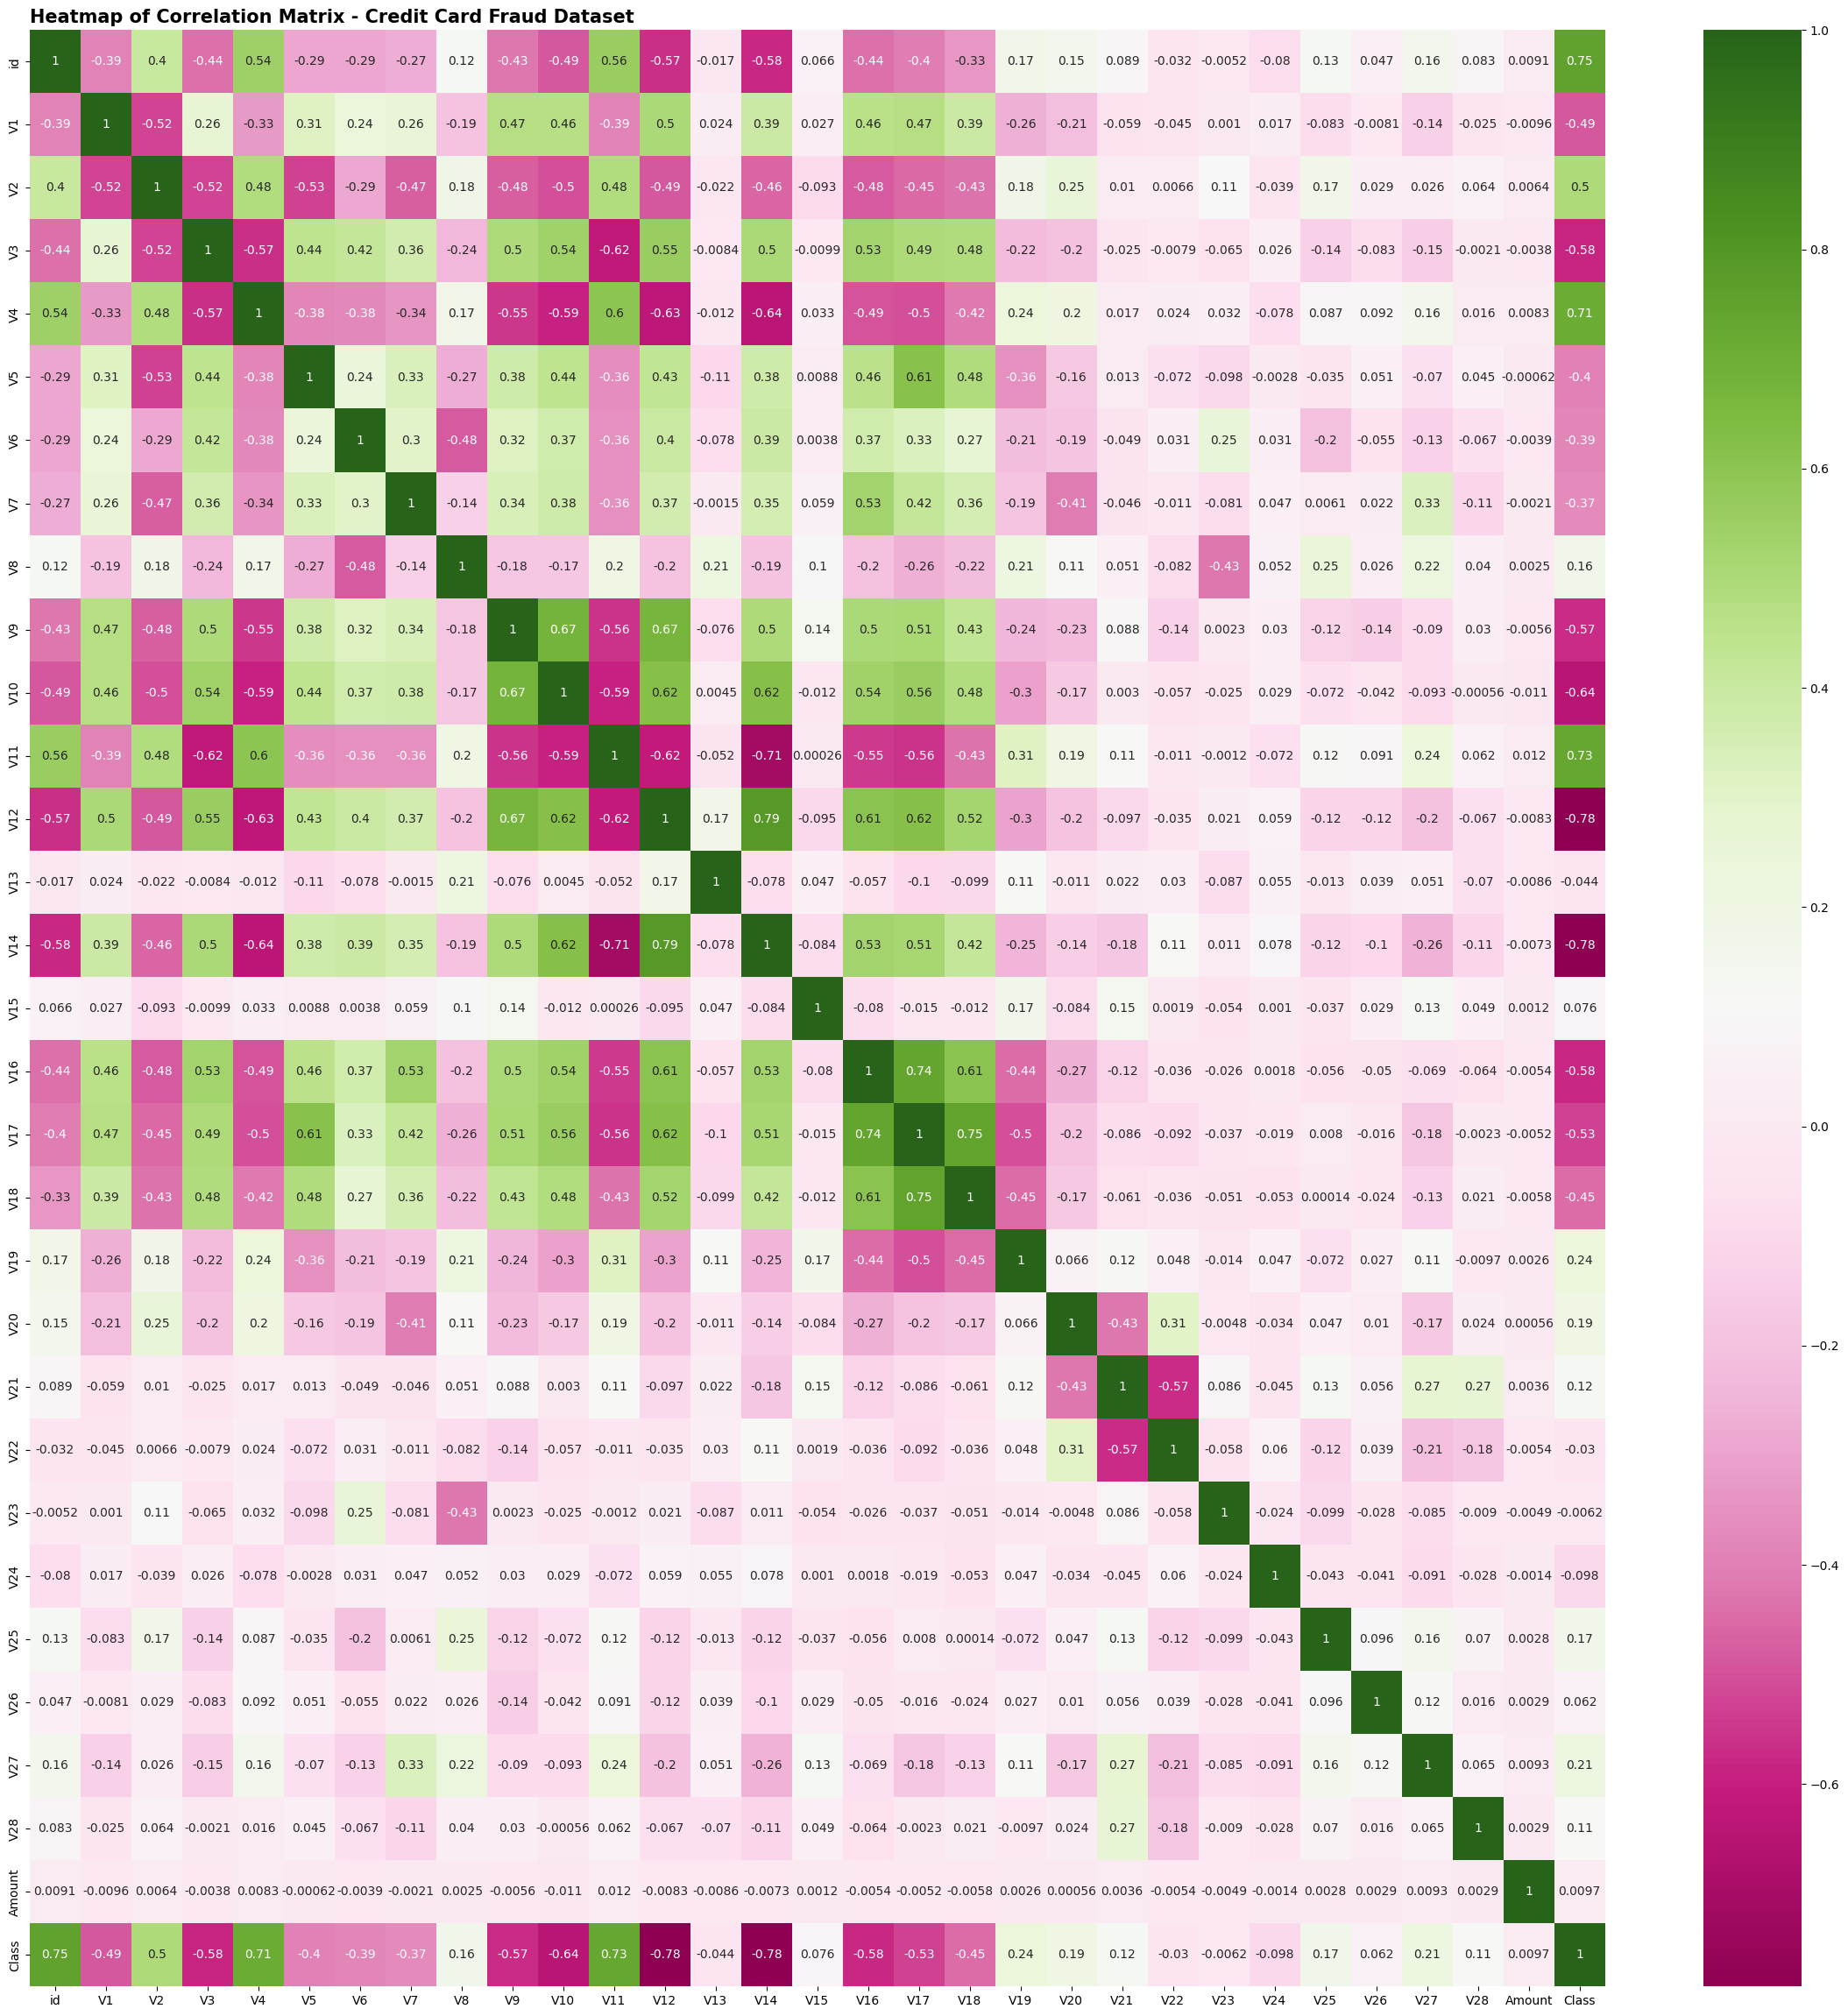

In [ ]:
plt.figure(figsize = (29,29))
ax = plt.axes()
sns.heatmap(fraud.corr(), annot =True, cmap="PiYG", ax = ax)
ax.set_title("Heatmap of Correlation Matrix - Credit Card Fraud Dataset", loc = "left", fontsize = 15, fontweight ="bold")

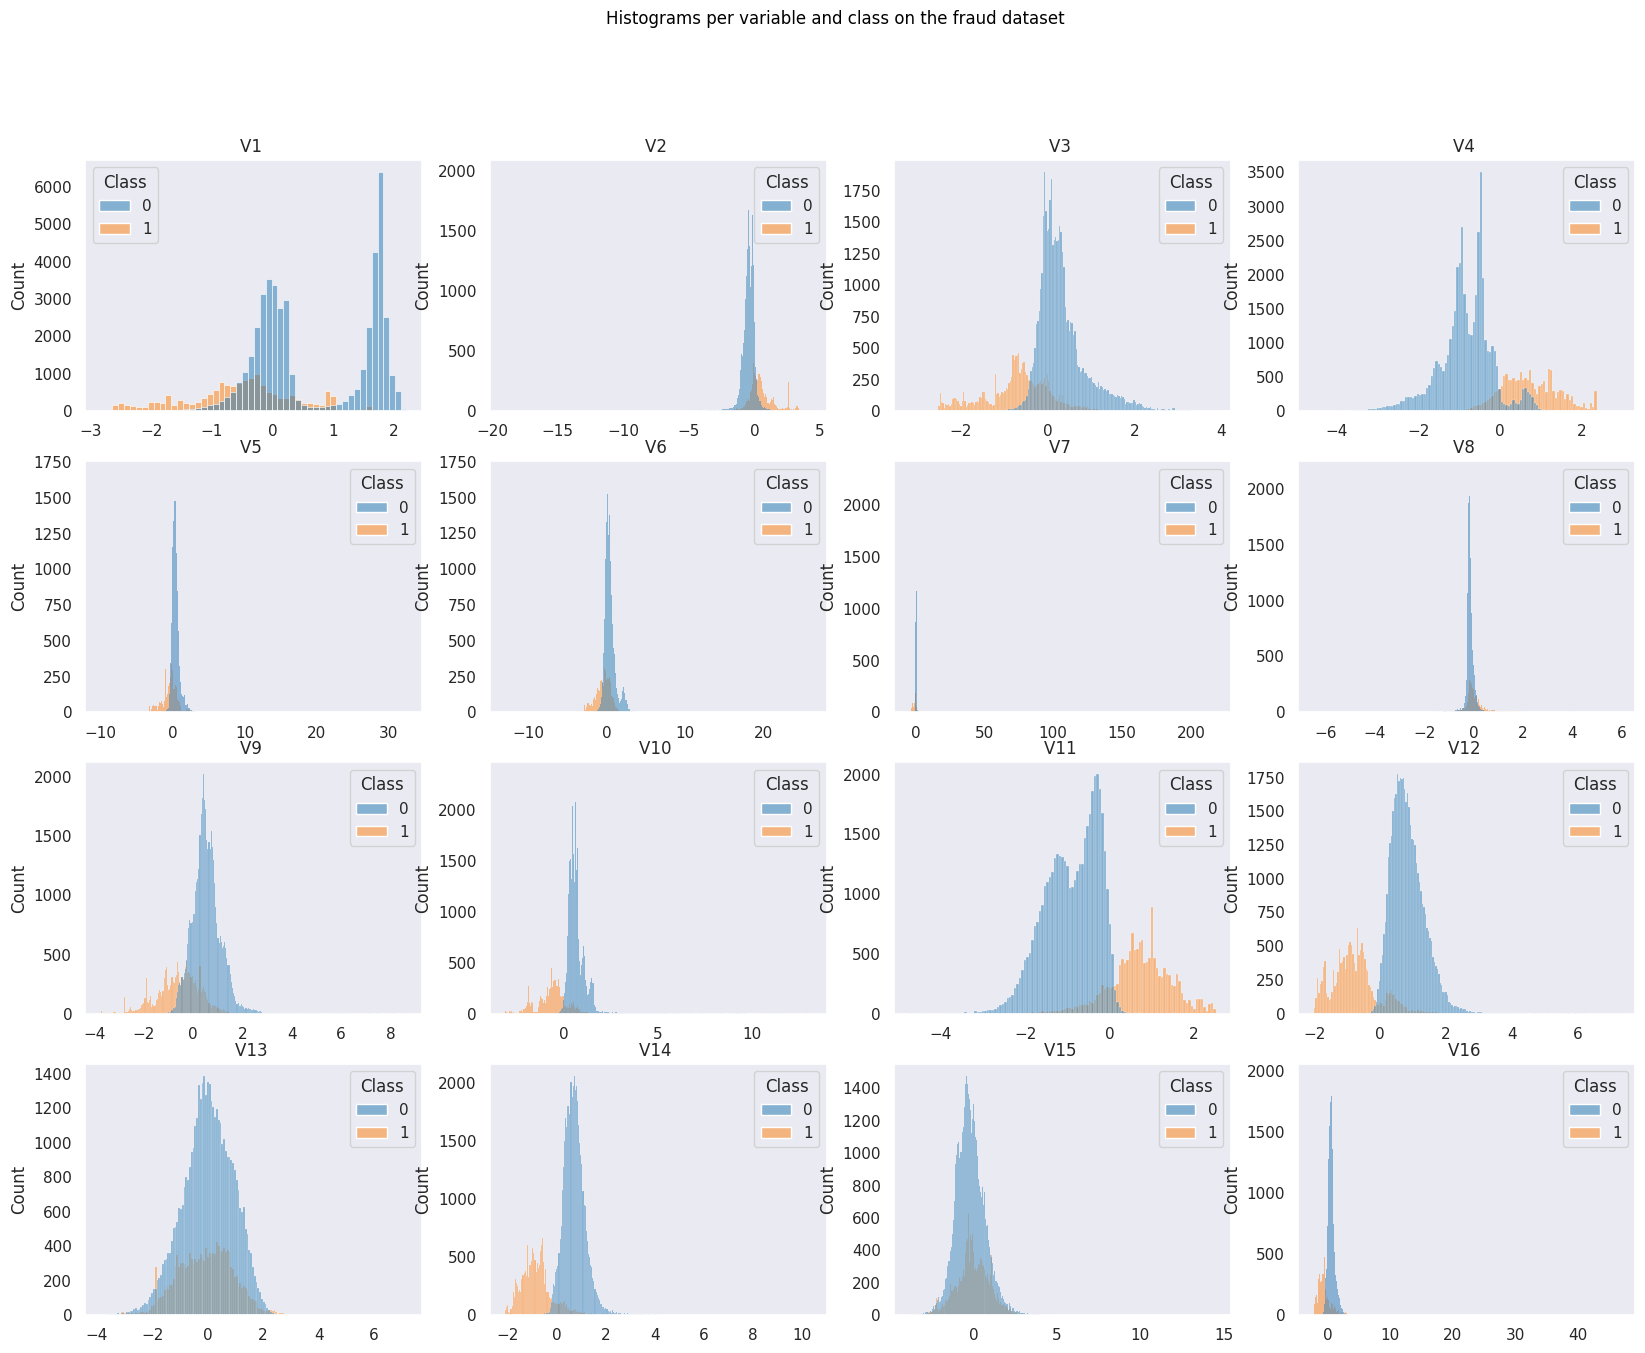

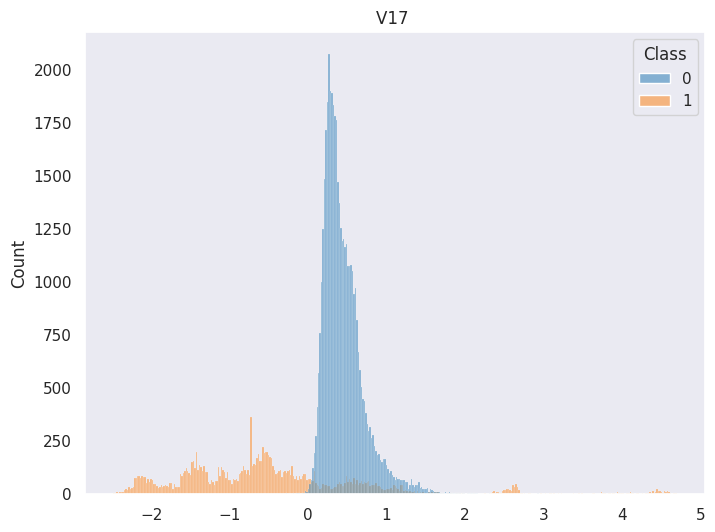

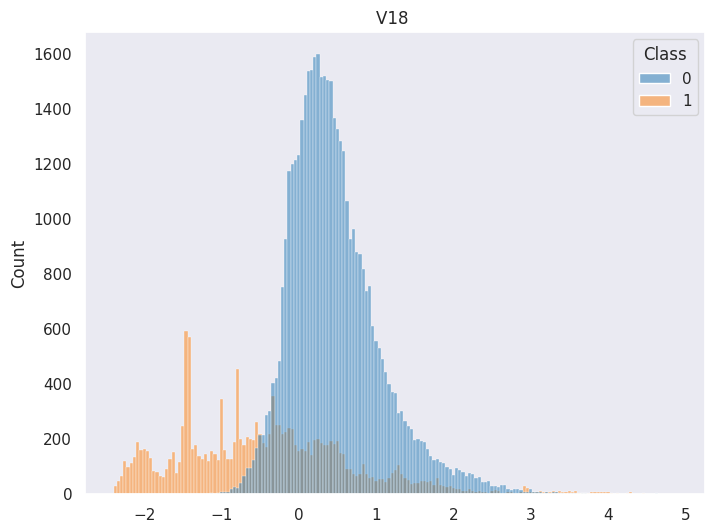

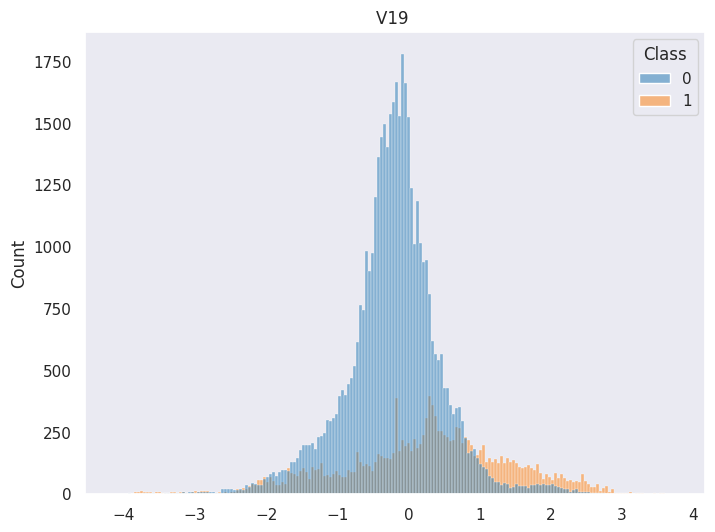

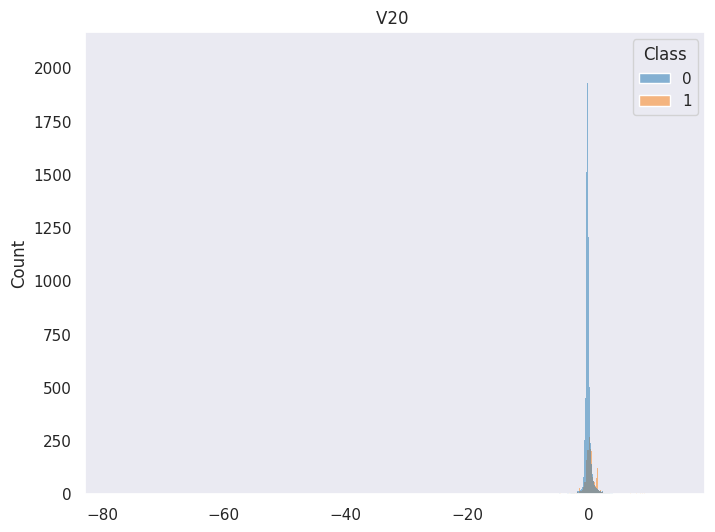

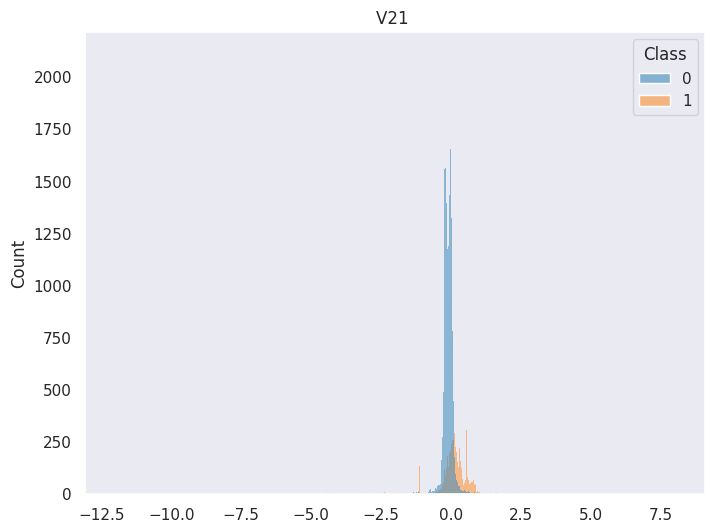

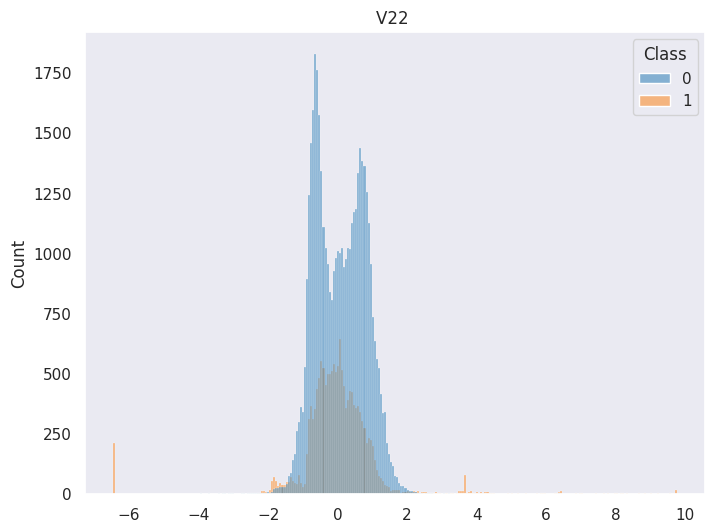

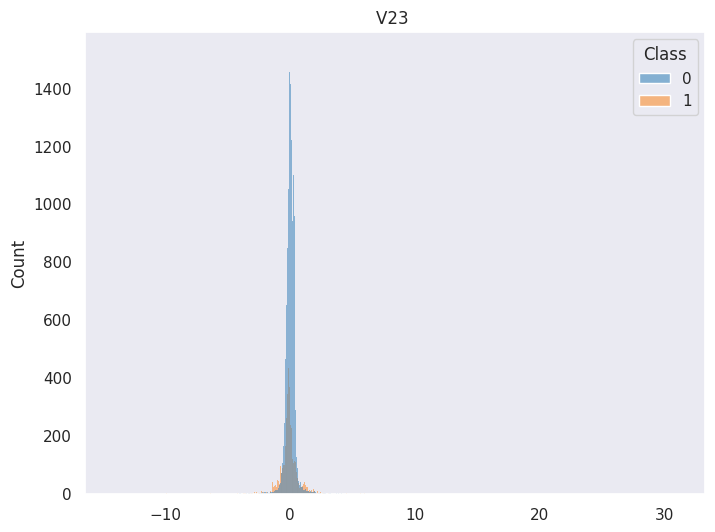

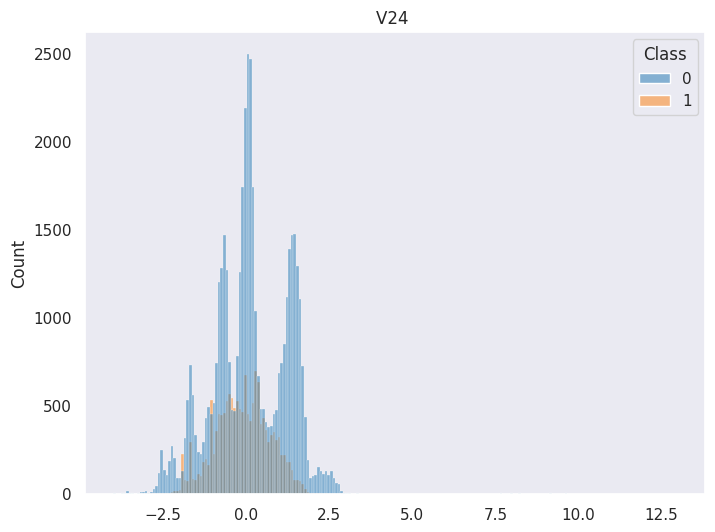

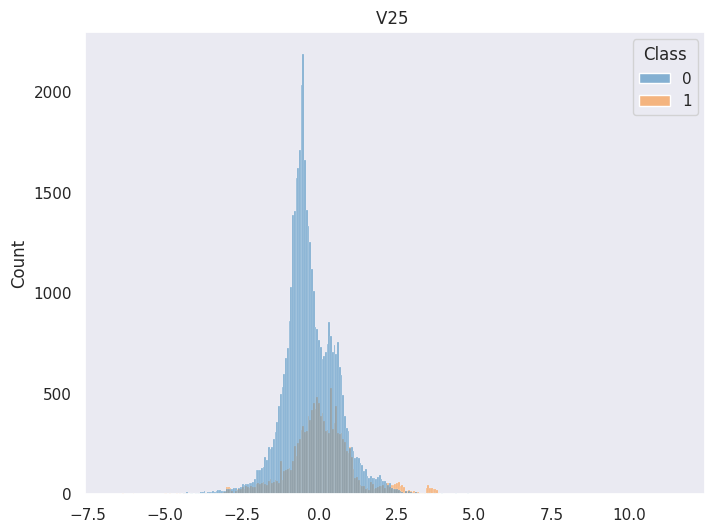

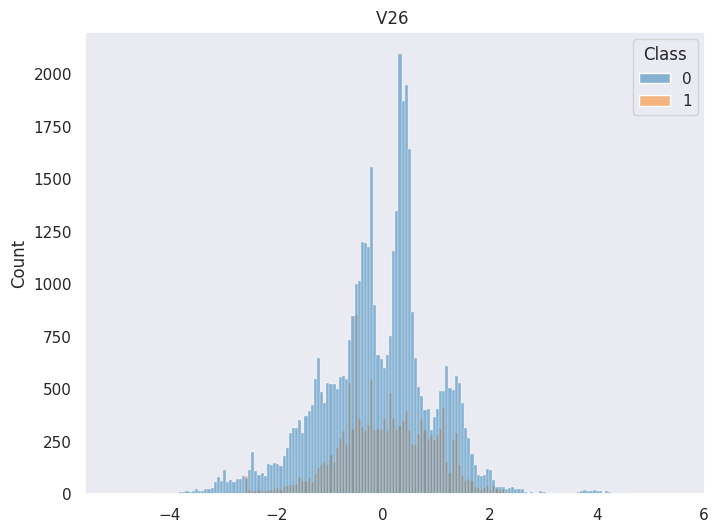

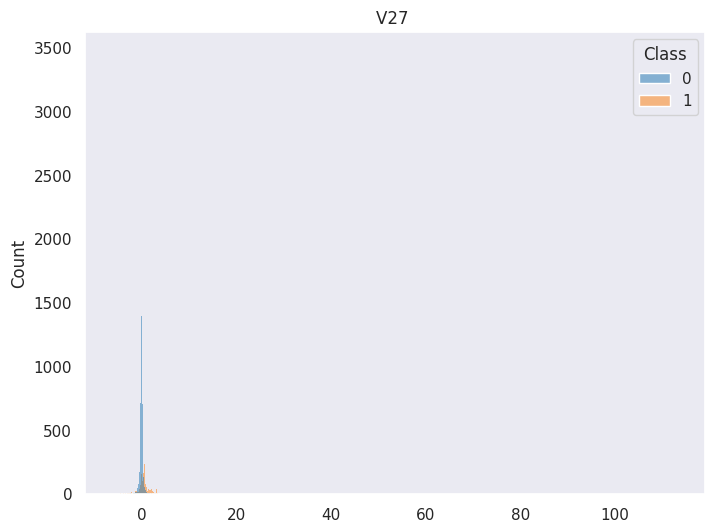

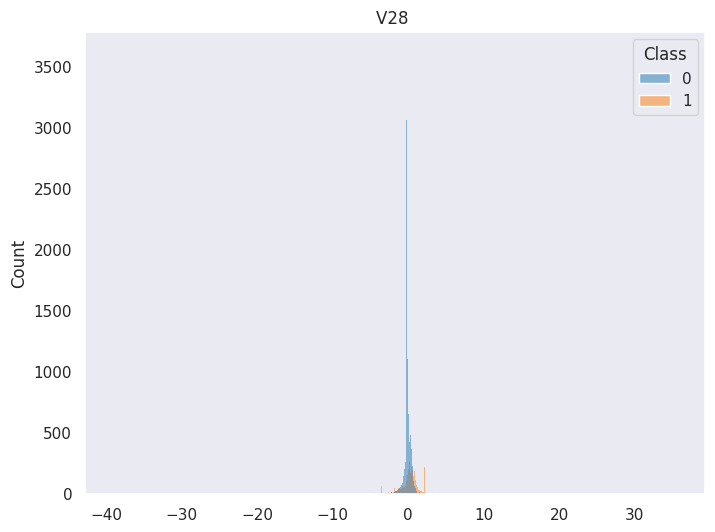

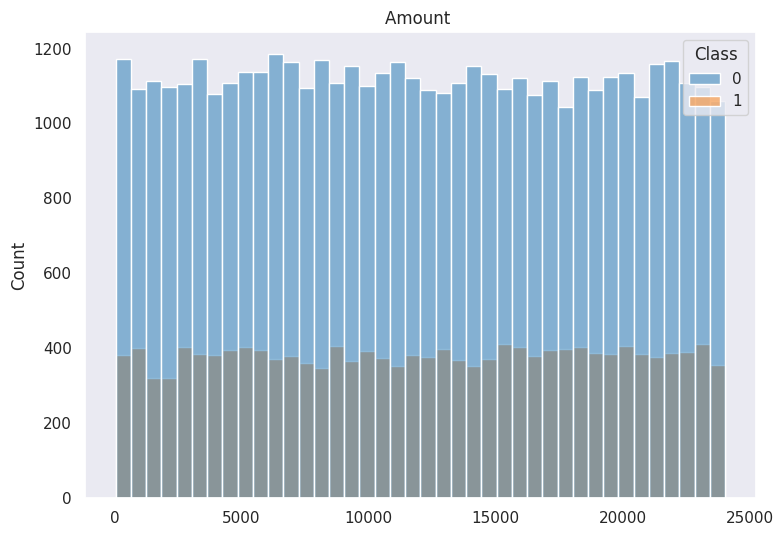

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
plt.suptitle("Histograms per variable and class on the fraud dataset")
sns.set_theme(style="dark")

columns = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount"]
measurements = ["", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", ""]

for i, column in enumerate(columns):
    if i < 16:
        plt.subplot(4, 4, i + 1)
        sns.histplot(data=fraud, x=column, hue="Class", palette="tab10")
        plt.xlabel("")
        plt.title("{} {}".format(column, measurements[i]))
    else:
        plt.figure(figsize=(8, 6))  # Create a separate figure for the 17th subplot
        sns.histplot(data=fraud, x=column, hue="Class", palette="tab10")
        plt.xlabel("")
        plt.title("{} {}".format(column, measurements[i]))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplot layout
plt.show()


In [ ]:
train_class, test_class = train_test_split(fraud, test_size=0.3, random_state = 42)

# Data preprocessing
X_train_class = train_class.drop(['V8', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'id', 'Class'], axis = 1)   # Ntrainx11
Y_train_class = OneHotEncoder(sparse=False).fit_transform(train_class[["Class"]].values) # Ntrainx3

X_test_class = test_class.drop(['V8', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'id', 'Class'], axis = 1)  # Ntestx11
Y_test_class = OneHotEncoder(sparse=False).fit_transform(test_class[["Class"]].values) # Ntestx3

d = X_train_class.shape[1]  # second index = 11
batch_size = len(X_train_class)  # = N train. Whole training dataset used per epoch

# Print shapes / dataset lengths
print(X_train_class.shape, Y_train_class.shape)
print(X_test_class.shape, Y_test_class.shape)

(42000, 15) (42000, 2)
(18001, 15) (18001, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
def heatmap(pred, text, scores):

    """
    Creates visualisation function for heatmaps on Test Data

    Inputs:
    pred: prediction vector by using the test dataset as inputs. (originating from: model.predict(x_test))
    text: text to be used on plot title (depending on moden)
    scores: print accouracy scores (originating from: model.evaluate(x_test,y_test))
    """

    plt.figure(figsize = (5,5))
    ax = plt.axes()

    sns.heatmap(confusion_matrix(np.argmax(Y_test_class, axis=1),       # Input class membership
                 np.argmax(pred, axis=1)),annot =True, cmap="PiYG", fmt='g')
    ax.set_title("Confusion Matrix - {}".format(text))
    ax.set_xlabel("Predicted Value")
    ax.set_ylabel("True Value")
    precision = precision_score(np.argmax(Y_test_class, axis=1), np.argmax(pred, axis=1))
    recall = recall_score(np.argmax(Y_test_class, axis=1), np.argmax(pred, axis=1))


    plt.text(0.45, 0.01,
             "Accuracy: {}%\nPrecision: {}\nRecall: {}".format(round(100 * scores[1], 2), round(100*precision, 2),
                                                                 round(100*recall, 2)),
             horizontalalignment='center',
             verticalalignment='center',
             transform=plt.gcf().transFigure,
             fontsize=13
             )
        # Print accuracy, precision, and recall outside the plot
    print("Accuracy: {}%".format(round(100 * scores[1], 2)))
    print("Precision: {}%".format(round(100 * precision, 2)))
    print("Recall: {}%".format(round(100 * recall, 2)))

# heatmap(pred_test_vi, "Bayesian Neural Network", scores2_vi)

In [ ]:
def plot_loss_acc(x, acc = True):

    """
    plot_loss_acc:
    Simple function that plots loss and accurracy metrics over epochs

    Input:
    x : Object to plot loss function (usually the history variable)
    acc: set to True if accurraccy should be plotted as well

    Output:
    Respective plots
    """
    history = x.history

    loss_values = history["loss"]
    val_loss_values = history["val_loss"]

    final_epoch = len(history["loss"])+1
    epochs = range(1,final_epoch)

    plt.plot(epochs, loss_values, "b", label = "Training Loss",linewidth=2)
    plt.plot(epochs, val_loss_values,"r", label = "Validation Loss", linewidth=2)
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

    if acc == True:
        plt.clf()

        acc_values = history['acc']
        val_acc_values = history['val_acc']
        plt.plot(epochs, acc_values, 'b', label='Training acc',linewidth=2)
        plt.plot(epochs, val_acc_values, 'r', label='Validation acc',linewidth=2)
        plt.title('Training and validation accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend(loc = "right")
        plt.show()

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/layers/util.py:98: UserWarning:

`layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/layers/util.py:108: UserWarning:

`layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.



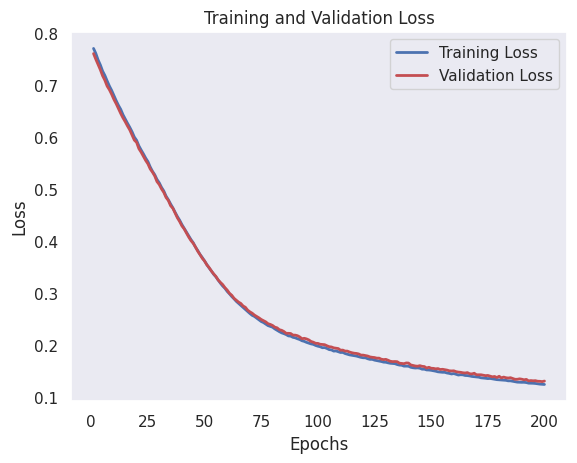

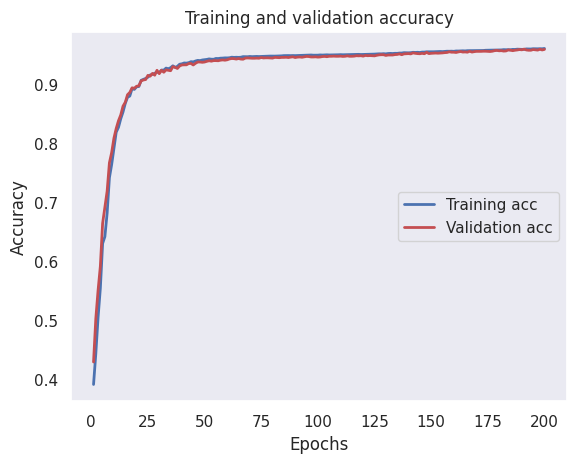

1313/1313 [==============================] - 2s 2ms/step
Train Scores:
Precision: 0.9632
Recall: 0.9616
Accuracy on training data: 0.9618333578109741 
 Error on training data: 0.12358225136995316
563/563 [==============================] - 1s 2ms/step

Test Scores:
Precision: 0.9627
Recall: 0.9611
Accuracy on test data: 0.961057722568512 
 Error on test data: 0.12454099953174591


array([[13426,    17],
       [  683,  3875]])

In [ ]:
seed_value=0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# KL divergence function - to be used as input for flipout layers
kl_divergence_fn=lambda q, p, _: tfp.distributions.kl_divergence(q, p) / (X_train_class.shape[0] *1.0)

bnn = Sequential()
bnn.add(Input(shape = 15))
bnn.add(tfp.layers.DenseFlipout( units =29,
                         kernel_prior_fn = tfp.layers.default_mean_field_normal_fn(),
                         kernel_posterior_fn = tfp.layers.default_mean_field_normal_fn() ,
                         kernel_divergence_fn = kl_divergence_fn,
                         activation = "relu"
                        )
       )
bnn.add(tfp.layers.DenseFlipout(units = 2,
                                kernel_prior_fn = tfp.layers.default_mean_field_normal_fn(),
                                kernel_posterior_fn = tfp.layers.default_mean_field_normal_fn(),
                                kernel_divergence_fn = kl_divergence_fn,
                                activation = "softmax")
       )


bnn.compile( optimizer = "adam", loss = 'categorical_crossentropy',
           metrics = ["acc", ]
           )


history_bnn = bnn.fit(X_train_class,Y_train_class, epochs = 200, validation_split = 0.1,
                      batch_size = batch_size,
                      verbose = 0
                     )

# Original plot_loss_acc function presented previously
plot_loss_acc(history_bnn, acc= True)
pred_train_vi= bnn.predict(X_train_class)
scores_vi = bnn.evaluate(X_train_class, Y_train_class, verbose=0)
train_precision = precision_score(np.argmax(Y_train_class, axis=1), np.argmax(pred_train_vi, axis=1), average='weighted')
train_recall = recall_score(np.argmax(Y_train_class, axis=1), np.argmax(pred_train_vi, axis=1), average='weighted')

print('Train Scores:')
print('Precision: {:.4f}'.format(train_precision))
print('Recall: {:.4f}'.format(train_recall))
print('Accuracy on training data: {} \n Error on training data: {}'.format(scores_vi[1],scores_vi[0]))


# Predict Y fit in test and measure scores
pred_test_vi= bnn.predict(X_test_class)
scores2_vi = bnn.evaluate(X_test_class, Y_test_class, verbose=0)
test_precision = precision_score(np.argmax(Y_test_class, axis=1), np.argmax(pred_test_vi, axis=1), average='weighted')
test_recall = recall_score(np.argmax(Y_test_class, axis=1), np.argmax(pred_test_vi, axis=1), average='weighted')

print('\nTest Scores:')
print('Precision: {:.4f}'.format(test_precision))
print('Recall: {:.4f}'.format(test_recall))
print('Accuracy on test data: {} \n Error on test data: {}'.format(scores2_vi[1],  scores2_vi[0]))

# Fitted values (outputs predicted from training inputs)
confusion_matrix(np.argmax(Y_test_class, axis=1),       # Input class membership
                 np.argmax(pred_test_vi, axis=1))

Accuracy: 96.11%
Precision: 99.56%
Recall: 85.02%


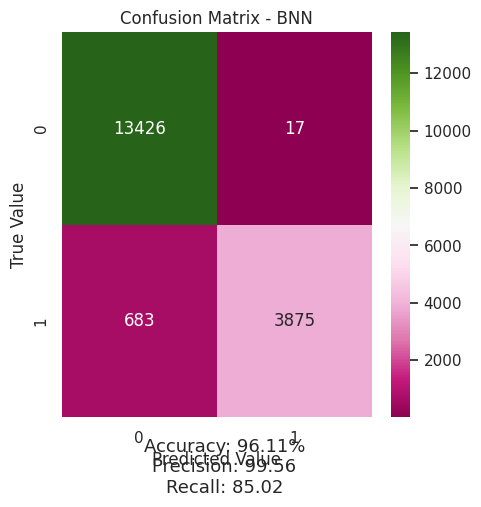

In [ ]:
heatmap(pred_test_vi, "BNN", scores2_vi)

In [ ]:
bnn.predict(X_test_class[0:1]+100)

1/1 [==============================] - 0s 21ms/step


array([[1., 0.]], dtype=float32)

In [ ]:
np.set_printoptions(suppress=True) # outputs now has decimals

In [ ]:
def mc(model, X_test, Y_test, n_iter , thres):
    """
    We will run n_iter iterations of the prediciton process over the X_test sample.
    The produced list has dimensions (number of iterations)x(sample size)x(number of labels) = 1000 x 980 x 3

    To get a sample of 1000 assigned probabilites per observation (row in dataframe)
    we need to reshape this list into a  980 x 3 x 100 (inserted to y_pred_per_obs vector)

    Thus the first element will produce the softmax output probability distribution over 1000 iterations.

    Our goal it to visualise these distributions per class. Thus a new function will be implemented later.

    Inputs:

    model: neural network on which the .predict() function will be used
    X_test,Y_test: corresponding datasets
    n_iter: number of iterations
    thres: threshold set upon median to organise predictions as valid / invalid. 0.5 was used in this analysis
    n_iter = n_iter
    thres = thres # threshold for medians
   """
    y_pred_bnn = [model.predict(X_test) for _ in range(n_iter)]  # perform n_iter iterations of predictions
    # reshape the previous matrix from Iter*N_test  *outputshape to N_test* iter * outputshape
    y_pred_per_obs = np.concatenate([y[:,:, np.newaxis] for y in y_pred_bnn], axis = -1)
    # if median of all single observation distributions >= threshold, insert it to y_pred vector
    # This produces a logical vector with 0/1 elements. Either only one of the elements will have a 1 (True).
    # Otherwise all will be 0 (none of the distributions met the criteria)
    y_pred = [[int(np.median(y) >= thres) for y in y_pred_per_obs] for y_pred_per_obs in y_pred_per_obs]
    y_pred = np.array(y_pred)
    print("Initial shape {} transformed to {}".format(np.shape(y_pred_bnn),y_pred_per_obs.shape))

    """
    Find positions/indices of invalid and valid classifications in test dataset
    """
    idx_valid = [any(y) for y in y_pred]   # records element if at least one element in y_pred[y] is true
    idx_invalid = [not any(y) for y in y_pred] # records element if all elements in y_pred[y] are false
    idx_invalid = np.where(idx_invalid)[0]     # extract indices of the mentioned elements. These will indicate positions on the test dataset
    idx_valid = np.where(idx_valid)[0]
    invalid = []
    for id in idx_invalid:
        invalid.append(test_class.iloc[[id]].index[0]) # (test.class.iloc[[id] -> produces row)  .index[0] - > captures index

    valid = []
    for id in idx_valid:
        valid.append(test_class.iloc[[id]].index[0])

    return n_iter, idx_valid, idx_invalid, valid, invalid, y_pred, y_pred_per_obs

In [ ]:
n_iter, idx_valid, idx_invalid, valid, invalid, y_pred, y_pred_per_obs = mc(bnn, X_test_class,Y_test_class,500,0.5)

563/563 [==============================] - 1s 2ms/step
Initial shape (500, 18001, 2) transformed to (18001, 2, 500)


In [ ]:
print(np.shape(idx_valid))
print(np.shape(idx_invalid))

NameError: ignored

In [ ]:
train_reg, test_reg = train_test_split(fraud, test_size=0.25, random_state = 42)

X_train_reg = train_reg.drop(['V8', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'id', 'Class'], axis = 1)   # Ntrainx11
Y_train_reg = np.array(train_reg[["Class"]]) # Ntrainx3

X_test_reg = test_reg.drop(['V8', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'id', 'Class'], axis = 1)  # Ntestx11
Y_test_reg = np.array(test_reg[["Class"]])

In [ ]:
d = X_train_reg.shape[1]  # second index = 12
batch_size = len(X_train_reg)  # = N train

#print shapes
print(X_train_reg.shape, Y_train_reg.shape)
print(X_test_reg.shape, Y_test_reg.shape)

#scale inputs
X_train_reg = preprocessing.scale(X_train_reg, axis=0, with_mean=True, with_std=True, copy= False)
X_test_reg = preprocessing.scale(X_test_reg, axis=0,with_mean=True,with_std = True, copy = False)

(45000, 15) (45000, 1)
(15001, 15) (15001, 1)


In [ ]:
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# KL divergence function - to be used as input for flipout layers
kl_divergence_fn=lambda q, p, _: tfp.distributions.kl_divergence(q, p) / (X_train_reg.shape[0] *1.0)

bnn_reg = Sequential()
bnn_reg.add(Input(shape = 15))
bnn_reg.add(tfp.layers.DenseFlipout( units =20,
                         kernel_prior_fn = tfp.layers.default_mean_field_normal_fn(),
                         kernel_posterior_fn = tfp.layers.default_mean_field_normal_fn() ,
                         kernel_divergence_fn = kl_divergence_fn,
                         activation = "relu"
                        )
       )

bnn_reg.add(tfp.layers.DenseFlipout(units = 1,
                                kernel_prior_fn = tfp.layers.default_mean_field_normal_fn(),
                                kernel_posterior_fn = tfp.layers.default_mean_field_normal_fn(),
                                kernel_divergence_fn = kl_divergence_fn,
                                activation = "linear")
       )


bnn_reg.compile( optimizer = "adam", loss = 'mse',
           metrics = [metrics.RootMeanSquaredError()]
           )

history_bnn_reg = bnn_reg.fit(X_train_reg,Y_train_reg, epochs = 500, validation_split = 0.1,
                      batch_size = batch_size,
                      verbose = 0
                     )

# Predict Y fit in train and measure scores
pred_train_vi_reg= bnn_reg.predict(X_train_reg)
scores_vi_reg = bnn_reg.evaluate(X_train_reg, Y_train_reg, verbose=0)
print('RMSE on training data: {} \n Error on training data: {}'.format(round(scores_vi_reg[1],3), round(scores_vi_reg[0],3)))

mae_train = mean_absolute_error(Y_train_reg, pred_train_vi_reg)
r2_train = r2_score(Y_train_reg, pred_train_vi_reg)


print('MAE on training data: {:.3f}'.format(mae_train))
print('R-squared (R²) on training data: {:.3f}'.format(r2_train))


# Predict Y fit in test and measure scores
pred_test_vi_reg= bnn_reg.predict(X_test_reg)
scores2_vi_reg = bnn_reg.evaluate(X_test_reg, Y_test_reg, verbose=0)
print('RMSE on test data: {} \n Error on test data: {}'.format(round(scores2_vi_reg[1],3),  round(scores2_vi_reg[0],3)))

mae_test = mean_absolute_error(Y_test_reg, pred_test_vi_reg)
r2_test = r2_score(Y_test_reg, pred_test_vi_reg)


print('MAE on test data: {:.3f}'.format(mae_test))
print('R-squared (R²) on test data: {:.3f}'.format(r2_test))


/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/layers/util.py:98: UserWarning:

`layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/layers/util.py:108: UserWarning:

`layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.



1407/1407 [==============================] - 4s 2ms/step
RMSE on training data: 0.177 
 Error on training data: 0.032
MAE on training data: 0.115
R-squared (R²) on training data: 0.826
469/469 [==============================] - 1s 2ms/step
RMSE on test data: 0.181 
 Error on test data: 0.033
MAE on test data: 0.115
R-squared (R²) on test data: 0.824


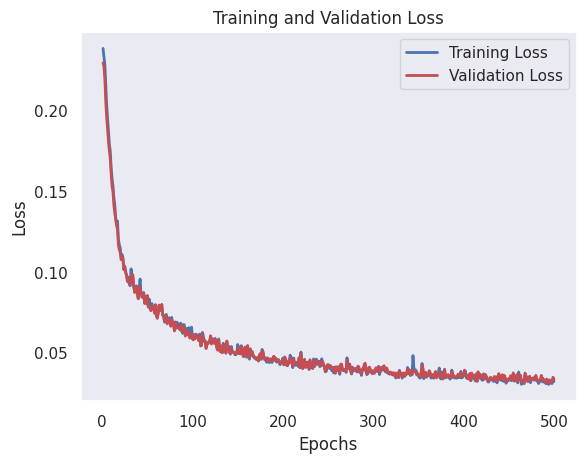

In [ ]:
plot_loss_acc(history_bnn_reg, acc= False)

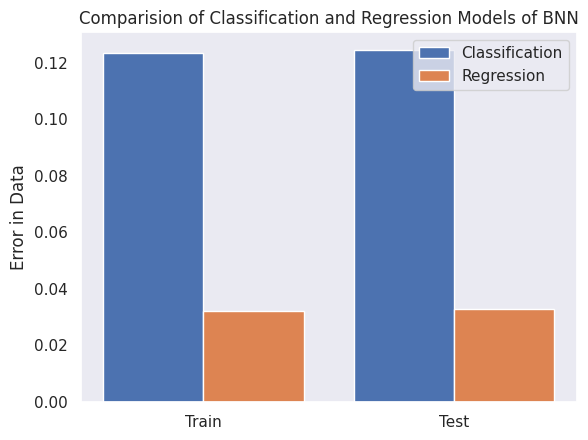

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = ['Train','Test']
Classification = [scores_vi[0],scores2_vi[0]]
Regression = [round(scores_vi_reg[0],3),round(scores2_vi_reg[0],3)]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Classification, 0.4, label = 'Classification')
plt.bar(X_axis + 0.2, Regression, 0.4, label = 'Regression')

plt.xticks(X_axis, X)
plt.ylabel("Error in Data")
plt.title("Comparision of Classification and Regression Models of BNN")
plt.legend()
plt.show()

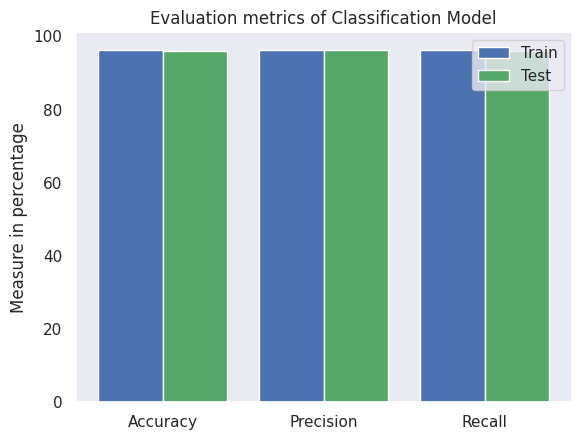

In [ ]:
X = ['Accuracy','Precision','Recall']
Train1 = [100*scores_vi[1],100*train_precision,100*train_recall]
Test1 = [100*scores2_vi[1],100*test_precision,100*test_recall]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Train1, 0.4, color = 'b',label = 'Train')
plt.bar(X_axis + 0.2, Test1, 0.4, color = 'g',label = 'Test')

plt.xticks(X_axis, X)
plt.ylabel("Measure in percentage")
plt.title("Evaluation metrics of Classification Model")
plt.legend()
plt.show()

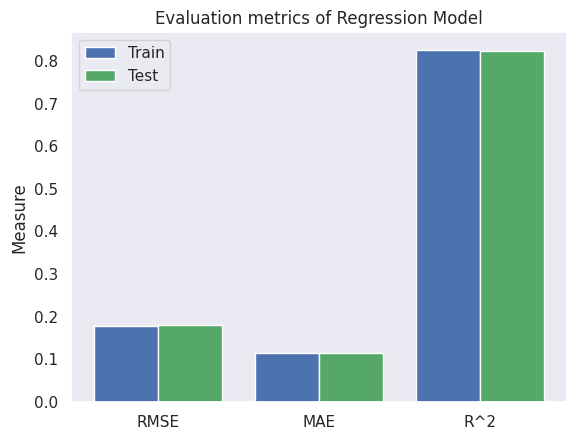

In [ ]:
X = ['RMSE','MAE','R^2']
Train2 = [round(scores_vi_reg[1],3),mae_train,r2_train]
Test2 = [round(scores2_vi_reg[1],3),mae_test,r2_test]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Train2, 0.4, color = 'b',label = 'Train')
plt.bar(X_axis + 0.2, Test2, 0.4, color = 'g',label = 'Test')

plt.xticks(X_axis, X)
plt.ylabel("Measure")
plt.title("Evaluation metrics of Regression Model")
plt.legend()
plt.show()